# Breast Cancer Wisconsin (Diagnostic) Classification

### Abstract:Breast Cancer Wisconsin (Diagnostic) Classification


The data gives the information about the featuters of cell in woman body that lead to Breast Cnacer.The dataset is collected from UCI Machine Learning Respertories https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29and this project is comes under research. The aim of this application is to avoid the Human Errors in the Domain of Health Care.


## Steps

-_1.Download the data from  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

-_2.Cleaning the data and removing the Null data points, duplicated data rows.

-_3.Visualising the data to know the characteristics of the features.

-_4.Test which classifier performs good on the data set using appropriate methods.

-_5.Test which parameters performs good on the classifier using appropriate methods.

-_6.Training the data with classifier.

-_7.Getting best Accuracy Scores


## Data Exploration

In [1]:
#Importing the necessary Libararies

import pandas as pd
import seaborn as sns

In [2]:
#Reading the data(csv file)

bcdf=pd.read_csv('data.csv')

In [3]:
#Head call fist five rows of the data set

bcdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Statistical terms of the dataframe

In [4]:
# Use describe to know the total statistical terms of dataframe

print(bcdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### To check null values present in data

In [55]:
#Check is the data contains null values

bcdf.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

### Clear null values present in data

In [44]:
#The null values present in data are removed

bcdf.fillna(np.mean,inplace=True)
print('The null values present in data ',bcdf.isnull().any())

The null values present in data  diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

### To check the duplicate rows in dataframe

In [46]:
# Check data contain duplicated rows

print('Any Duplicate rows in data is ',bcdf.duplicated().any())

Any Duplicate rows in data is  False


In [6]:
#Convert the Strings presenet in feature diagnosis into intergers

get={'M':1,'B':0}

In [7]:
bcdf.diagnosis=bcdf.diagnosis.map(get)

In [8]:
#drop the unecessary features in data

bcdf.drop(columns={'id','Unnamed: 32'},inplace=True)

In [9]:
#print shape of dataframe after removing unecessary columns

print(bcdf.shape)

(569, 31)


In [10]:
#values of feature diagnosis after converting into interger

bcdf['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [11]:
#value count 

value_count=bcdf['diagnosis'].value_counts()

In [12]:
value_count

0    357
1    212
Name: diagnosis, dtype: int64

## Benchmark Model

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes.T odetermine the benchmark model the total percentage of tumors classified as 'miligant' in this data set is taken and based on that 'miligant' percentage the actual bechmark model is decided.

In [38]:
outcome_count = bcdf.diagnosis.value_counts()
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Benign', 'Malignant']

outcome_count['Percent'] = 100*outcome_count['diagnosis']/sum(outcome_count['diagnosis'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of tumors classified as \'malignant\' in this data set is: {}'.format(100*float(bcdf.diagnosis.value_counts()[1])/float((len(bcdf)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of tumors classified as 'malignant' in this data set is: 37.25834797891037

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,diagnosis,Percent
Benign,357,63
Malignant,212,37


### The blind guessing of the data gives an accuracy of getting maligant is 37.258347978910365%.So, its the Benchmark accuarcy score is 62%



To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of bengin. Since it is interested in how accurate the predictions are, then calculate the proportion of instances where prediction of the bengin is correct. 

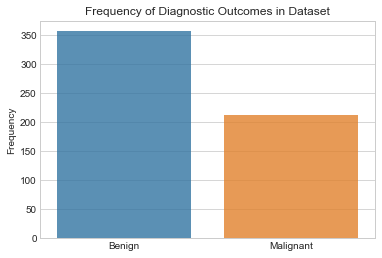

In [54]:
# Visualize frequency of diagnoses in dataset
sns.barplot(x = ['Benign', 'Malignant'], y = 'diagnosis', data = outcome_count, alpha = .8)
plt.title('Frequency of Diagnostic Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

## Data Visualization


Ploting thehistograms of the features of the dataframe

In [14]:
#import matplotlib.pyplot

import matplotlib.pyplot as plt

##### The columns[0:9]

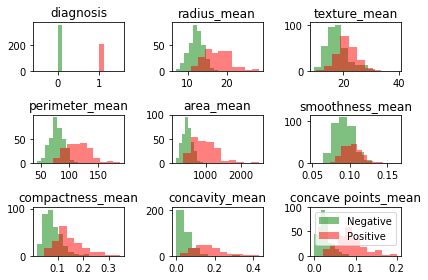

In [15]:

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:9])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
plt.legend()
plt.show()   

##### The columns[9:18] 

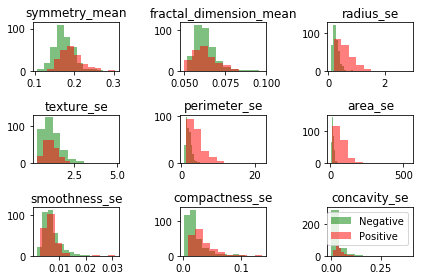

In [16]:

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[9:18])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
plt.legend()
plt.show()   

##### The columns[18:27]

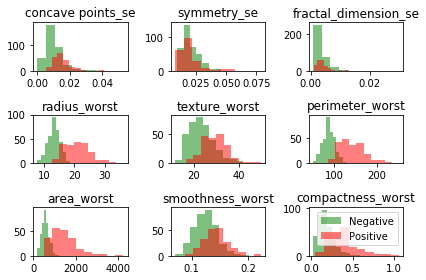

In [17]:

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[18:27])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
plt.legend()
plt.show()   

##### The columns[27:]

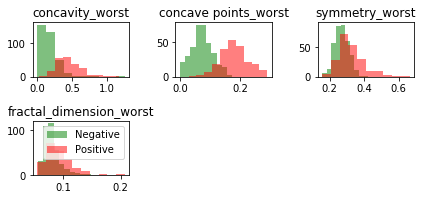

In [18]:

# Instantiate figure object
fig = plt.figure()
#plt.sup_title('Tumor Characteristic (means)')

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[27:])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'g')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)



plt.tight_layout()
plt.legend()
plt.show()   

### Heatmap:   
A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

    The below heatmap gives the correlation in between the features of the DataFrame.

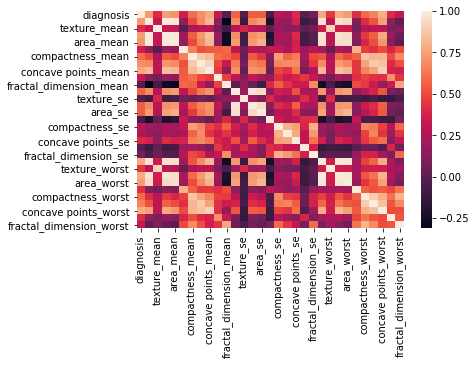

In [19]:
sns.heatmap(bcdf.corr())

## Data Preprocessing

### Removing Outliers

In [20]:
import numpy as np

outliers  = []
for feature in bcdf.columns:
    
    # TODO: Calculate Q1 (2.5th percentile of the data) for the given feature
    Q1 = np.percentile(bcdf[feature] ,2.5 )
    
    # TODO: Calculate Q3 (97.5th percentile of the data) for the given feature
    Q3 = np.percentile(bcdf[feature] ,97.5)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(bcdf[~((bcdf[feature] >= Q1 - step) & (bcdf[feature] <= Q3 + step))])
    outliers.extend(bcdf[~((bcdf[feature] >= Q1 - step) & (bcdf[feature] <= Q3 + step))].index)
    print(outliers)



# Remove the outliers, if any were specified
good_data = bcdf.drop(bcdf.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'diagnosis':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'radius_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'texture_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'perimeter_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'area_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'smoothness_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'compactness_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'concavity_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'concave points_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'symmetry_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'fractal_dimension_mean':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[]
Data points considered outliers for the feature 'radius_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


[212, 461]
Data points considered outliers for the feature 'texture_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461]
Data points considered outliers for the feature 'perimeter_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


[212, 461, 212, 461]
Data points considered outliers for the feature 'area_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
212,1,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,1,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


[212, 461, 212, 461, 212, 461]
Data points considered outliers for the feature 'smoothness_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461]
Data points considered outliers for the feature 'compactness_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461]
Data points considered outliers for the feature 'concavity_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,0,9.029,17.33,58.79,250.5,0.1066,0.1413,0.3130,0.04375,0.2111,...,10.31,22.65,65.50,324.7,0.1482,0.4365,1.2520,0.1750,0.4228,0.1175
152,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


[212, 461, 212, 461, 212, 461, 68, 152]
Data points considered outliers for the feature 'concave points_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152]
Data points considered outliers for the feature 'symmetry_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152]
Data points considered outliers for the feature 'fractal_dimension_se':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
152,0,9.731,15.34,63.78,300.2,0.1072,0.1599,0.4108,0.07857,0.2548,...,11.02,19.49,71.04,380.5,0.1292,0.2772,0.8216,0.1571,0.3108,0.1259


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'radius_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'texture_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'perimeter_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'area_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'smoothness_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'compactness_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'concavity_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'concave points_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'symmetry_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]
Data points considered outliers for the feature 'fractal_dimension_worst':


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


[212, 461, 212, 461, 212, 461, 68, 152, 152]


The outliers in the data are removed

In [21]:
print('Shape of DataFrame after removing ouliers ',good_data.shape)
print('Number of outiers ',bcdf.shape[0]-good_data.shape[0])

Shape of DataFrame after removing ouliers  (565, 31)
Number of outiers  4


Splitting the data into training and testing sets

In [22]:
from sklearn.cross_validation import train_test_split

new_data=good_data.drop(columns={'diagnosis'})
X_train,X_test,y_train,y_test=train_test_split(new_data,good_data['diagnosis'],random_state=10)

C:\Users\reddy\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Using Normalizer to rescale the data

In [23]:
#The data is preprocessing using sklearn.preprocessing.Normalizer
from sklearn.preprocessing import Normalizer

norm=Normalizer()
X_train_normal=norm.transform(X_train)
X_test_normal=norm.transform(X_test)

## Data Modeling

### Techinques

In [24]:
#import the techniques 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Collecting parameters of respective techniques in a directory

RF_params = {'n_estimators':[10,50,100]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}

### Cross Validation: 
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [25]:
from sklearn.cross_validation import KFold, cross_val_score

In [26]:
from sklearn.grid_search import GridSearchCV
models=[]

models.append(('DTC', DecisionTreeClassifier(), DTC_params))
models.append(('RFC', RandomForestClassifier(), RF_params))
models.append(('LR', LogisticRegression(), LR_params))

C:\Users\reddy\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
results=[]
names=[]
scoring='accuracy' 
for name, model, params in models:
    kfold = KFold(len(X_train_normal), n_folds=5, random_state=2, shuffle=True)
    model_grid = GridSearchCV(model, params)
    cv_results = cross_val_score(model_grid, X_train_normal, y_train, cv = kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Cross Validation Accuracy %s: Accarcy: %f SD: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Cross Validation Accuracy DTC: Accarcy: 0.938655 SD: 0.035092
Cross Validation Accuracy RFC: Accarcy: 0.950392 SD: 0.008641
Cross Validation Accuracy LR: Accarcy: 0.910224 SD: 0.028274


From the above Corss Validation Accuracy and SD the RFC(Randm Forest Classifier) gives best score respectively.So, RFC is used in this Application

### BoxPlot:
 box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers.

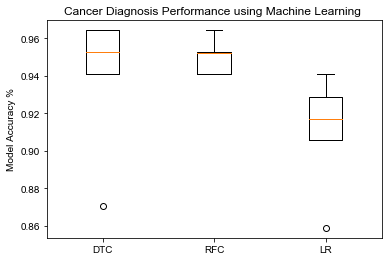

In [28]:
plt.boxplot(results, labels = names)
plt.title('Cancer Diagnosis Performance using Machine Learning ')
plt.ylabel('Model Accuracy %')
sns.set_style("whitegrid")
plt.show()

## Results

### GridSeachCV
GridSearchCV needs a metric to optimize. A vectorizer doesn’t have anything like an accuracy, so it doesn’t make sense to run any kind of hyperparameter optimization on your vectorize method.

The main issue is that it’s impossible to tell whether a change in your vectorizer will lead to higher or lower accuracy in your resulting model, unless you keep the model constant.

In [29]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

clf = RandomForestClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [10,50,100,150,200], 
              'criterion': ['gini', 'entropy']}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_normal,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train_normal, y_train)).predict(X_test_normal)
best_predictions = best_clf.predict(X_test_normal)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.9577
F-score on testing data: 0.9434

Optimized Model
------
Final accuracy score on the testing data: 0.9718
Final F-score on the testing data: 0.9623


The Accuracy score and F-score of Unoptimized model is less than the Optimized model. The Optimized model gives the best Accuracy score and F-score for the Application.

### Confusion Matrix

Compute confusion matrix to evaluate the accuracy of a classification. By definition a confusion matrix is such that C i , j is equal to the number of observations known to be in group but predicted to be in group .

The confusion_matrix function evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class <https://en.wikipedia.org/wiki/Confusion_matrix>`_. (Wikipedia and other references may use different convention for axes.)

In [31]:
#import confusion_matrix, classification_report from sklearn.metrics

from sklearn.metrics import confusion_matrix, classification_report

pred=best_clf.predict(X_test)
matrix=confusion_matrix(pred,y_test)
matrix=pd.DataFrame(matrix,columns=['Predicted Negative','Predicted Postive'],index=['Actual Negative','Actual Positive'])
print(matrix)

                 Predicted Negative  Predicted Postive
Actual Negative                  89                 53
Actual Positive                   0                  0


### Classification Report


In [32]:
#import classification report from sklearn.metrics 

from sklearn.metrics import classification_report

print(classification_report(best_predictions,y_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        89
          1       0.96      0.96      0.96        53

avg / total       0.97      0.97      0.97       142



## Feature Importance

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

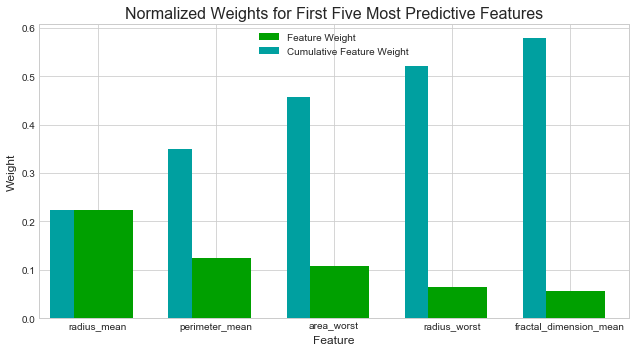

In [33]:
import visuals as vs

importances = best_clf.feature_importances_
vs.feature_plot(importances, X_train, y_train)

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [34]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.9718
F-score on testing data: 0.9623

Final Model trained on reduced data
------
Accuracy on testing data: 0.9437
F-score on testing data: 0.9339


If the training time factor is a factor ,then the reduced dataset can be taken as a training set because the training of reduced data is less eventhough the accuracy reduces.